In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import SGD

D:\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
train=pd.read_csv('cfir_train.csv')
test=pd.read_csv('cfir_test.csv')

In [19]:
train.shape


(50000, 3073)

In [20]:
test.shape

(10000, 3073)

In [21]:
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values

In [22]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values


In [23]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [34]:
x_train=x_train.reshape(50000,32,32,3)
x_test=x_test.reshape(10000,32,32,3)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


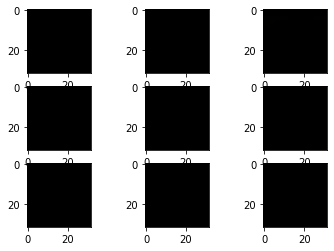

In [35]:
 for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])


In [36]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

sgd=SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 15, 15, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                      

In [ ]:
m_name=model.fit(x_train,y_train,batch_size=64,epochs=11,validation_split=0.2)

Epoch 1/11
625/625 [==============================] - 13s 20ms/step - loss: 1.5449 - accuracy: 0.4483 - val_loss: 5.5879 - val_accuracy: 0.2041
Epoch 2/11
625/625 [==============================] - 12s 20ms/step - loss: 1.2226 - accuracy: 0.5634 - val_loss: 1.6231 - val_accuracy: 0.4302
Epoch 3/11
625/625 [==============================] - 12s 19ms/step - loss: 1.0880 - accuracy: 0.6125 - val_loss: 1.5646 - val_accuracy: 0.4768
Epoch 4/11
625/625 [==============================] - 12s 19ms/step - loss: 0.9970 - accuracy: 0.6482 - val_loss: 1.3223 - val_accuracy: 0.5405
Epoch 5/11
107/625 [====>.........................] - ETA: 9s - loss: 0.9082 - accuracy: 0.6786

In [ ]:
pred = model.predict(x_test)

In [ ]:
plt.imshow(x_test[4])
print(pred.argmax(axis=1)[4])

In [ ]:
m_name.history.keys()

In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

In [ ]:
plt.plot(m_name.history['accuracy'])
plt.plot(m_name.history['val_accuracy'])

In [ ]:
plt.plot(m_name.history['loss'])
plt.plot(m_name.history['val_loss'])